#### Rex Gayas
#### Week 7 Exercise 7.2 Spring 2024
#### DSC410-T301 Predictive Analytics (2245-1)
#### Predicting Categorical Values

#### Load the Dataset & Initial Assessment

In [1]:
import pandas as pd

# File path to the dataset
file_path = "D:\\ALPHA\\Dynamic Folder\\Bellevue\\Spring 2024\\Predictive Analytics\\Week 7\\eda_classification.csv"

# Loading the dataset
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
print(data.head())

# Checking the data types of each column
print(data.dtypes)

# Checking for missing values
print(data.isnull().sum())


          x0    x1         x2         x3        x4         x5         x6  \
0 -17.933519   Jun   6.559220 -14.452810 -4.732855   0.381673   2.563194   
1 -37.214754  July  10.774930 -15.384004 -0.077339  10.983774 -15.210206   
2   0.330441   Aug -19.609972  -9.167911  2.064124  12.071688  12.506141   
3 -13.709765   Aug  -8.011390   6.759264  1.727615  -1.768382  24.039733   
4  -4.202598   May   7.076210 -26.004919 -4.269696  -3.414224   2.115989   

            x7          x8         x9        x10     x11       x12     x13  \
0  ($1,306.52)  -89.394348 -28.454044 -16.201298  -0.01%  0.217010   tesla   
1     ($24.86)  153.032652 -32.557736  69.675903   0.00% -3.584908  Toyota   
2    ($110.85) -141.437276 -20.794952  55.042604   0.00% -3.991366     bmw   
3    ($324.43)   51.039653  -7.046908 -31.424419   0.01%  7.908897  Toyota   
4   $1,213.37   -31.046700  19.061182 -31.525515  -0.01%  0.846719   Honda   

         x14        x15       x16    x17  y  
0    thurday   9.729891 -0.7

Loaded the dataset and printed the first few rows to understand the data. Dataset contains a mix of numerical and categorical features. Features x7, and x11 to x13 seem to be categorical with values like dates and car brands, which would require encoding to numerical values. Missing values have been noted on columns such as x1 and x2.

#### Handlle Missing Values

In [2]:
# Handling of missing values for continuous variables
for column in data.select_dtypes(include=['float64']).columns:
    median = data[column].median()
    data[column] = data[column].fillna(median)

# Handling of missing values for categorical variables
for column in data.select_dtypes(include=['object']).columns:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)

# Verify that there are no missing values left
print(data.isnull().sum())



x0     0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
y      0
dtype: int64


For columns with numerical data (float64), missing values are filled with the median of the column while columns with categorical data (object), missing values are filled with the mode of the column. There are no missing values left in the dataset, indicated by all zeros in the output.

#### EDA (Exploratory Data Analysis)

##### Summary Statistics for Continuous Variables

In [3]:
# Calculate summary statistics for continuous variables
summary_stats = data.describe()
print(summary_stats)


                x0           x2           x3           x4           x5  \
count  9999.000000  9999.000000  9999.000000  9999.000000  9999.000000   
mean      6.501138    -3.729918    -7.335830    -0.001321     1.347115   
std      29.135661    17.233729    38.349260     3.994907     9.605734   
min    -106.809919   -65.137848  -150.846091   -14.616540   -37.499530   
25%     -13.091886   -15.351276   -33.072206    -2.681270    -5.047231   
50%       6.659263    -3.825630    -7.374468     0.010637     1.217076   
75%      26.196314     7.761736    18.464243     2.635557     7.802829   
max     114.823451    67.685933   127.204103    16.923269    38.624213   

                x6           x8           x9          x10          x12  \
count  9999.000000  9999.000000  9999.000000  9999.000000  9999.000000   
mean      1.214413    -4.239913    -0.297257   -22.481443     0.034566   
std      17.352962   131.915386    37.987287    91.709978     6.064051   
min     -59.900503  -661.764937  -142

Generated summary statistics to help understand the central tendency, dispersion, and shape of the dataset's distribution. 

##### Histograms for Continuous Variables

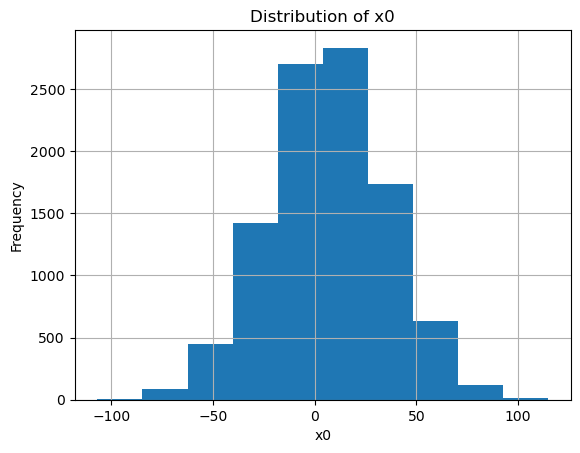

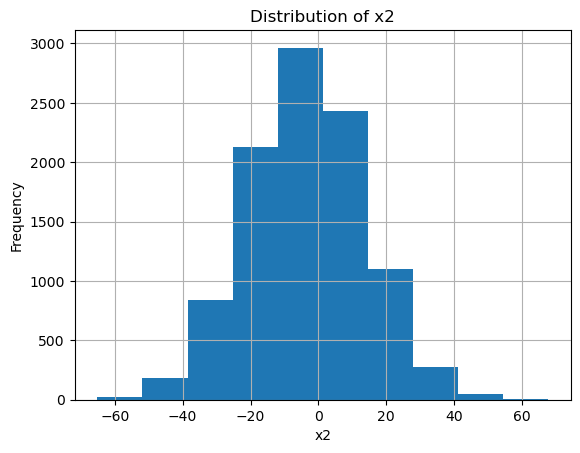

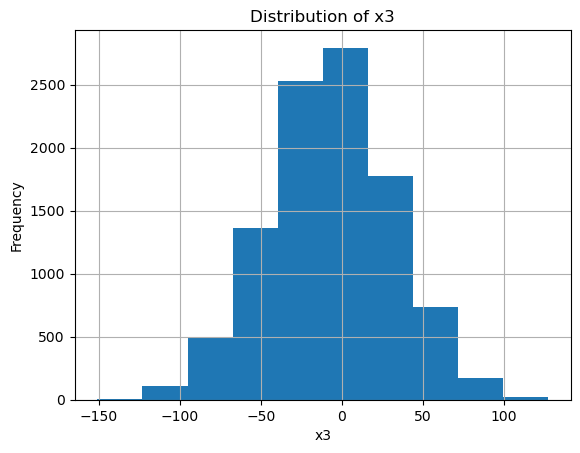

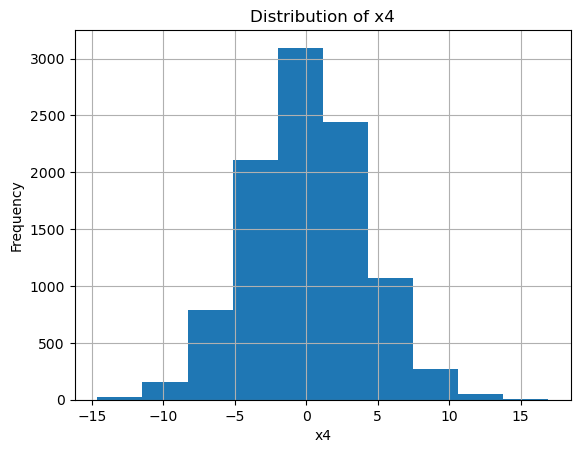

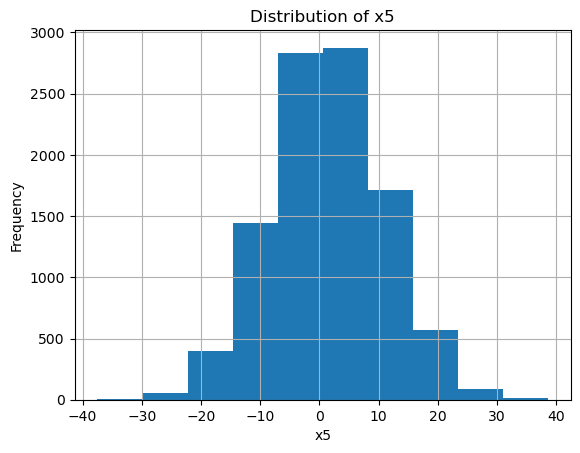

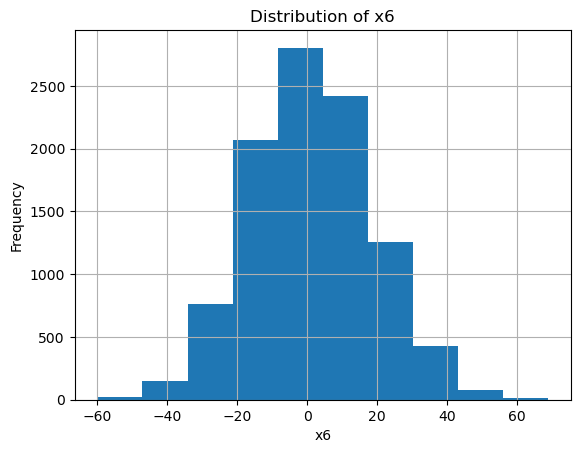

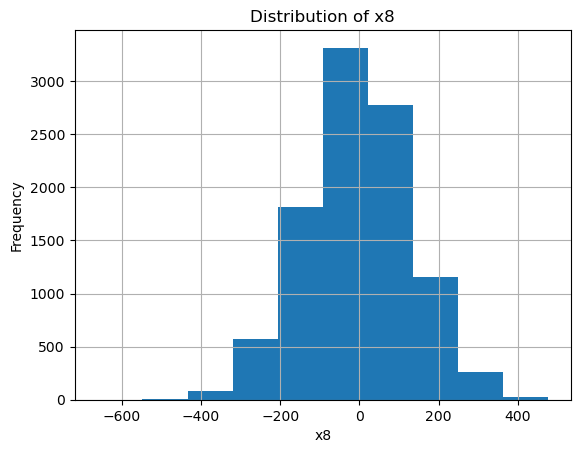

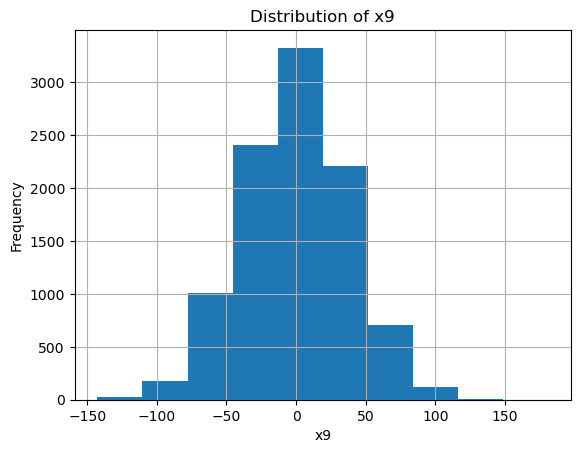

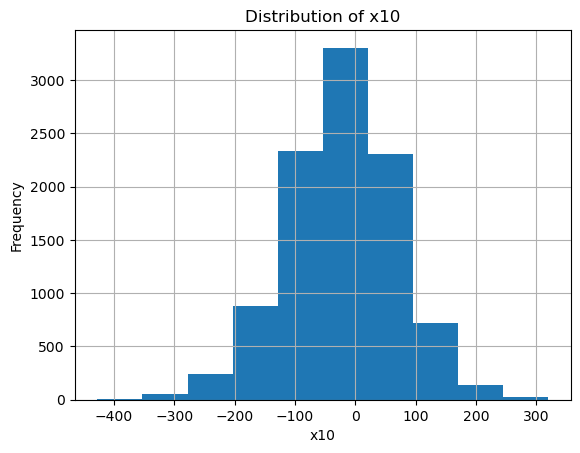

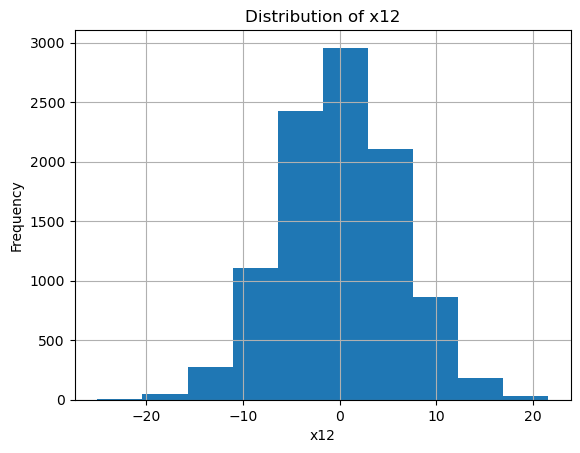

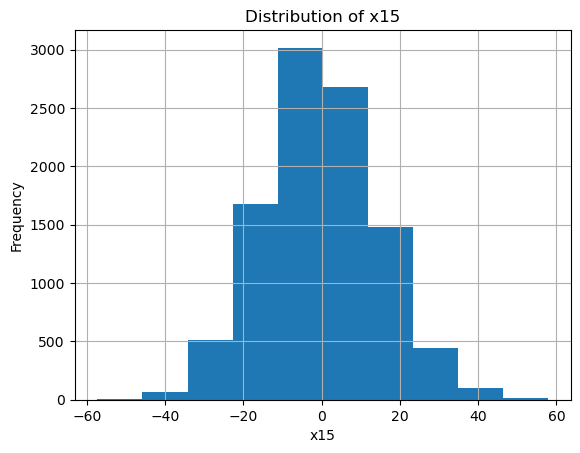

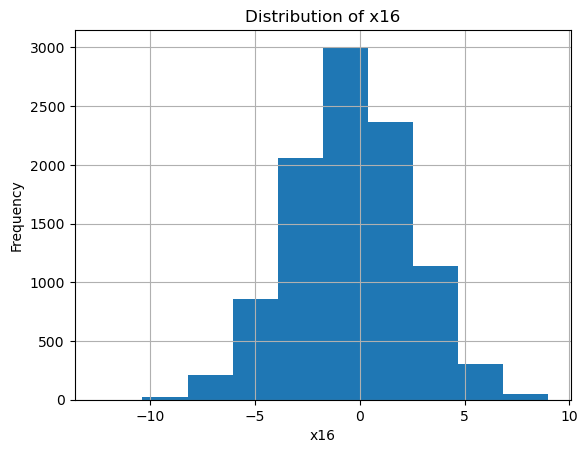

In [4]:
import matplotlib.pyplot as plt

# Plot histograms for all continuous variables
continuous_columns = data.select_dtypes(include=['float64']).columns
for column in continuous_columns:
    plt.figure()
    data[column].hist()
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


Plotted histograms to provide a visual representation of the distribution of each variable, indicating the frequency of data points within certain range intervals.

##### Count Occurrences of Categorical Variables

In [5]:
# Count occurrences of each category in categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
category_counts = {column: data[column].value_counts() for column in categorical_columns}
for column, counts in category_counts.items():
    print(f"Counts for {column}:")
    print(counts)


Counts for x1:
x1
July       2709
Jun        2357
Aug        2059
May        1144
sept.       912
Apr         413
Oct         246
Mar         116
Nov          27
Feb          10
Dev           5
January       1
Name: count, dtype: int64
Counts for x7:
x7
($243.22)     6
$552.78       2
($35.66)      2
$824.89       2
($302.71)     2
             ..
($660.27)     1
($836.02)     1
$91.38        1
$1,514.51     1
($863.61)     1
Name: count, Length: 9849, dtype: int64
Counts for x11:
x11
0.00%     3916
-0.01%    2409
0.01%     2361
0.02%      581
-0.02%     579
0.03%       73
-0.03%      72
-0.04%       4
0.04%        4
Name: count, dtype: int64
Counts for x13:
x13
volkswagon    3133
Toyota        2773
bmw           1837
Honda         1277
tesla          545
chrystler      291
nissan          90
ford            39
mercades        11
chevrolet        3
Name: count, dtype: int64
Counts for x14:
x14
wed          3711
thurday      3336
wednesday    1489
thur         1097
tuesday       214
fri

Counted the occurrences of each category within categorical variables of the dataset which showed the distribution of categories for variables such as months, prices, car brands, and days of the week, giving insight into the frequency and presence of categories.

##### Relationship Between Categorical Variables and Target Variable y

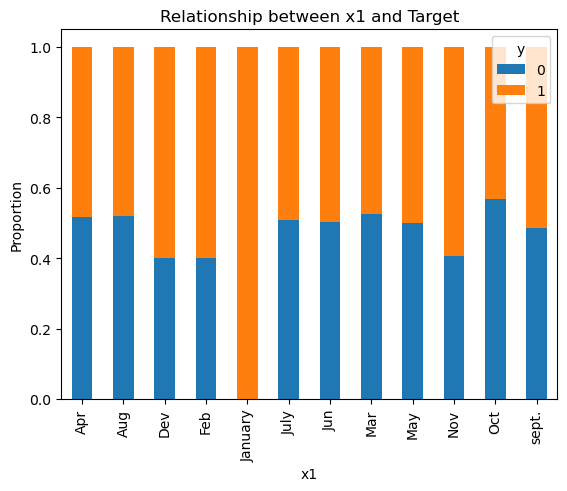

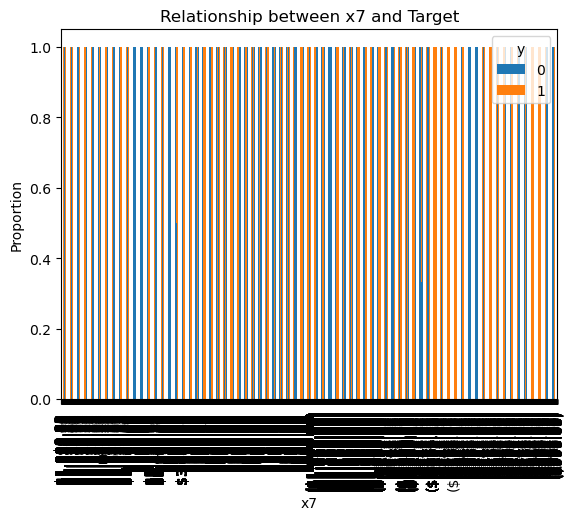

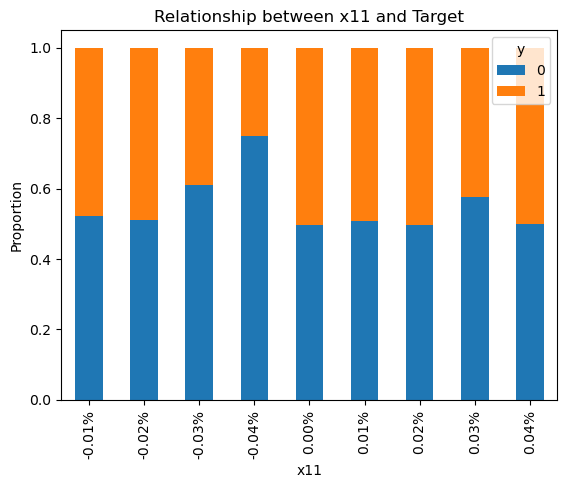

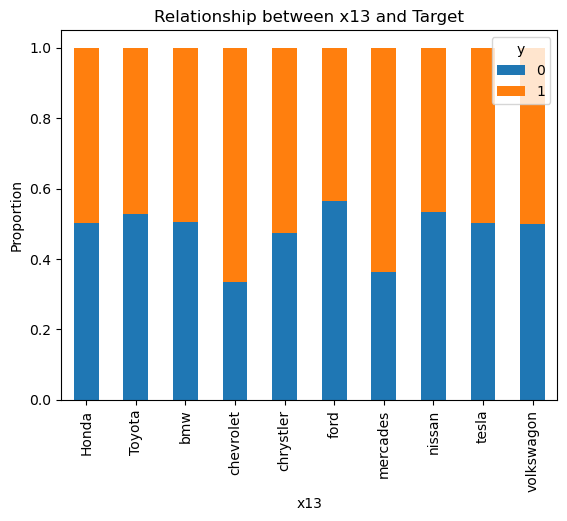

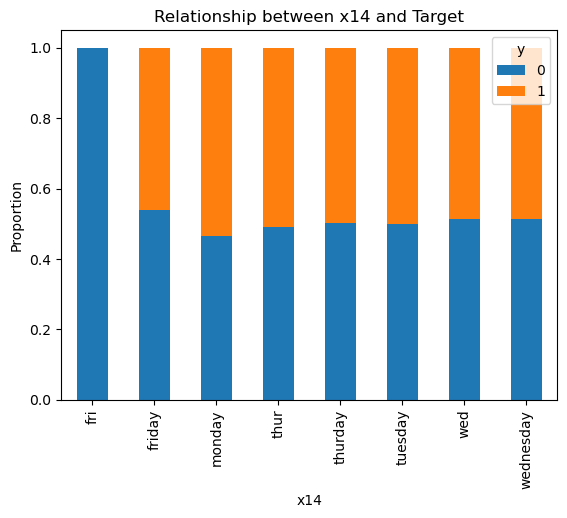

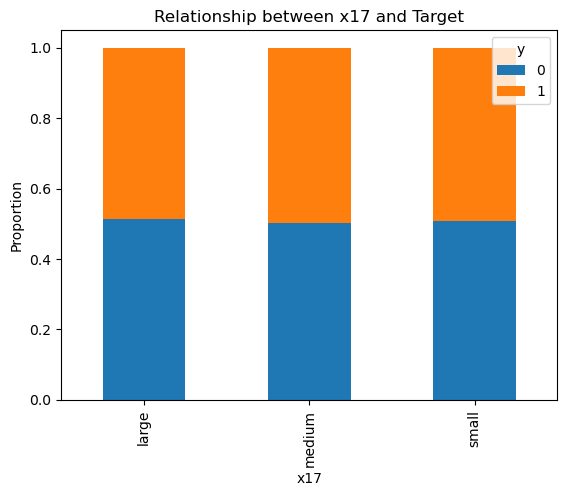

In [6]:
# Visualize the relationship between categorical variables and the target variable `y`
for column in categorical_columns:
    cross_tab = pd.crosstab(data[column], data['y'], normalize='index')
    cross_tab.plot(kind='bar', stacked=True)
    plt.title(f'Relationship between {column} and Target')
    plt.xlabel(column)
    plt.ylabel('Proportion')
    plt.show()


Created bar plots to visualize the relationship between each categorical variable and the binary target variable y. The plots depict the distribution of the target classes (0 and 1) within each category of the variables.

#### Correlation Analysis

##### Correlation Matrix

In [7]:
# Ensure that only numeric columns are considered for the correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for numeric columns only
correlation_matrix = numeric_data.corr()

# Print the correlation matrix
print(correlation_matrix)


           x0        x2        x3        x4        x5        x6        x8  \
x0   1.000000 -0.219489 -0.147803  0.001724 -0.190175 -0.037336 -0.362781   
x2  -0.219489  1.000000 -0.024891  0.002962 -0.115689  0.144738 -0.216316   
x3  -0.147803 -0.024891  1.000000  0.016469 -0.152110  0.121436  0.130761   
x4   0.001724  0.002962  0.016469  1.000000 -0.005836 -0.000729 -0.016484   
x5  -0.190175 -0.115689 -0.152110 -0.005836  1.000000 -0.038980  0.059071   
x6  -0.037336  0.144738  0.121436 -0.000729 -0.038980  1.000000 -0.089644   
x8  -0.362781 -0.216316  0.130761 -0.016484  0.059071 -0.089644  1.000000   
x9   0.087407  0.078236  0.026148 -0.022472 -0.094442  0.109608  0.062623   
x10 -0.116537  0.070761  0.076368  0.002224 -0.097249 -0.186146  0.086897   
x12 -0.001611  0.002416  0.002101  0.009153  0.001792  0.004960 -0.011239   
x15 -0.125488  0.144793 -0.183559  0.004371  0.121215 -0.018823  0.000520   
x16 -0.058123  0.100921  0.079027  0.004894 -0.030417  0.127848  0.148371   

Performed a correlation analysis on the dataset's numerical columns. The correlation matrix shows the Pearson correlation coefficients between pairs of columns, indicating the strength and direction of the linear relationship between them. A correlation coefficient close to 1 implies a strong positive relationship, close to -1 implies a strong negative relationship, and close to 0 implies no linear relationship.

##### Heatmap of Correlation Matrix

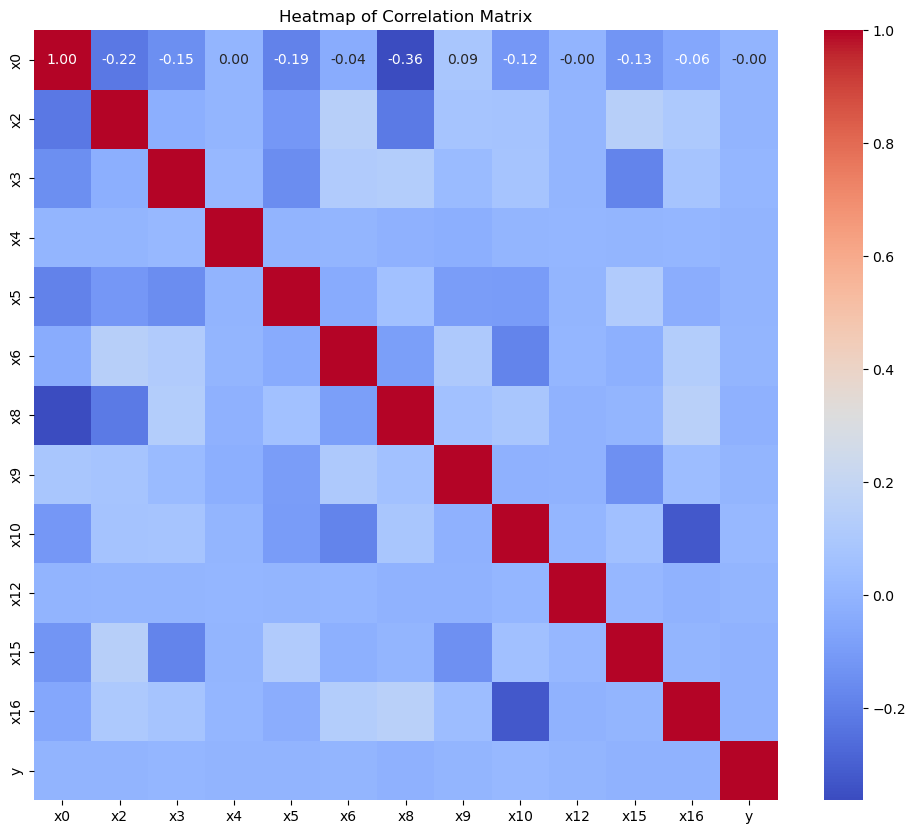

In [8]:
import seaborn as sns

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()


Visualized the correlation matrix using a heatmap from the Seaborn library. Darker colors represent stronger positive or negative correlations, while lighter colors indicate weaker correlations. Annotated values on the heatmap show the exact correlation coefficients, offering a clear and immediate visual summary of how variables in the dataset are related to each other.

#### Boxplots for Outlier Detection

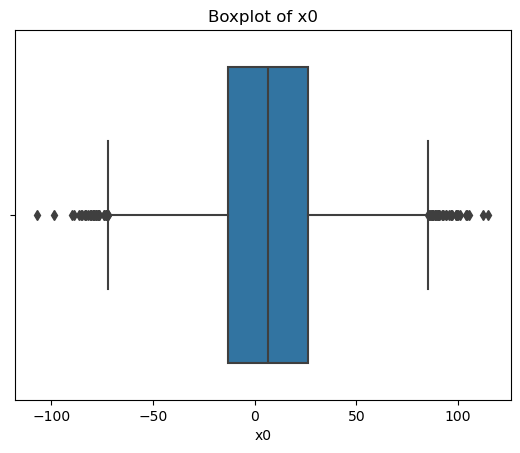

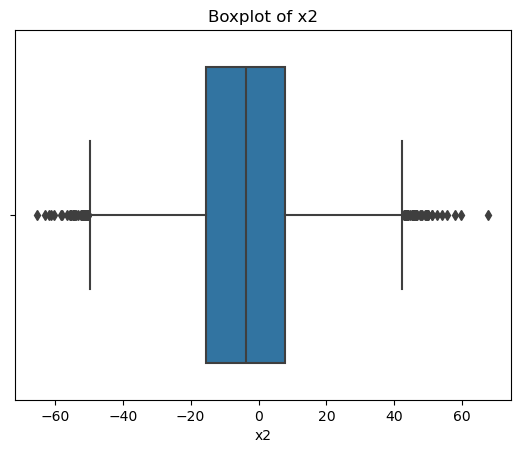

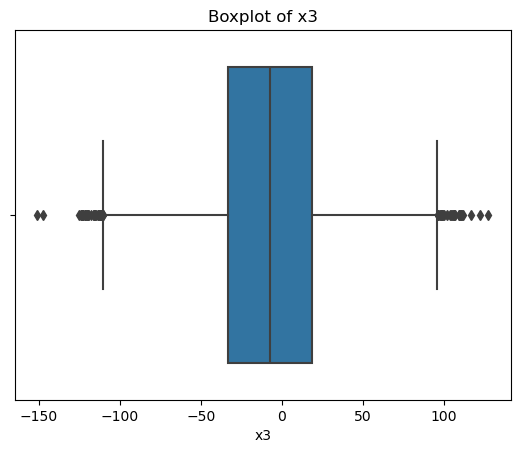

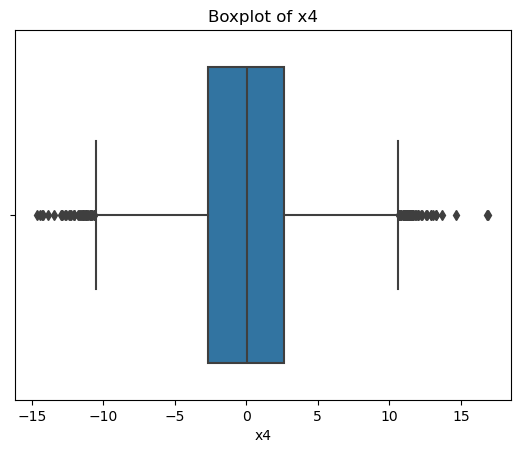

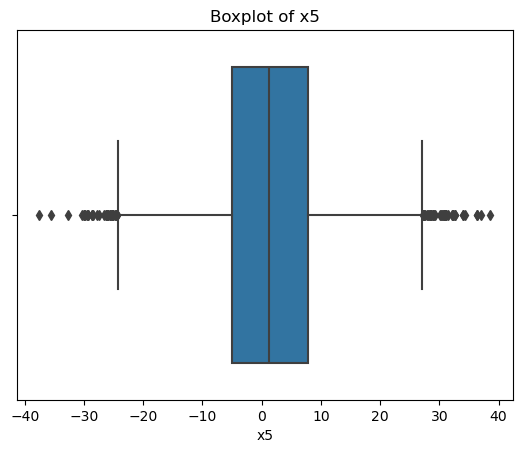

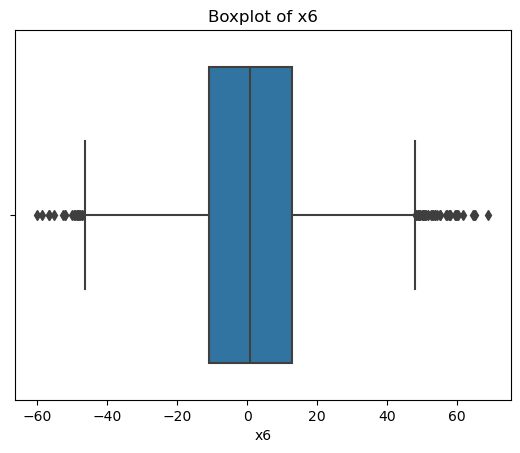

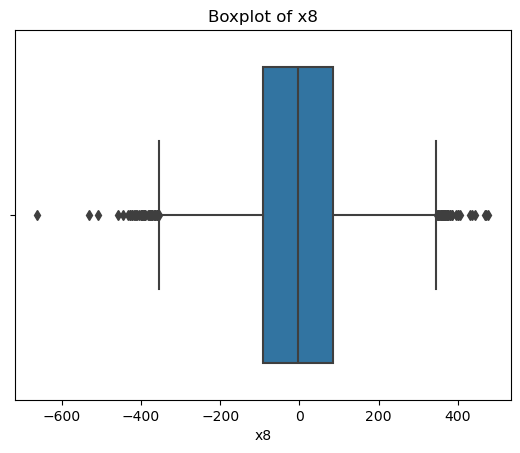

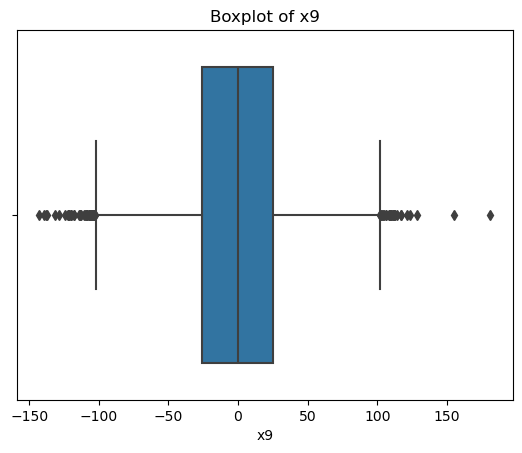

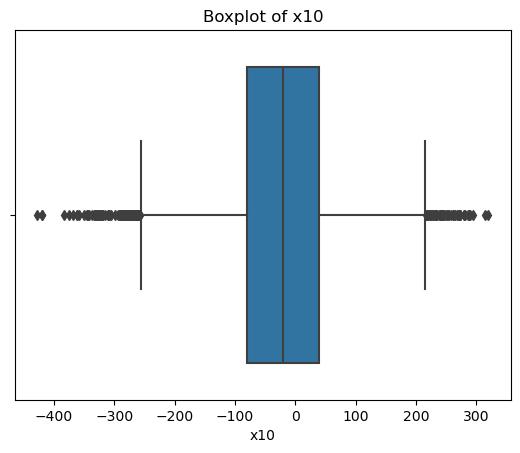

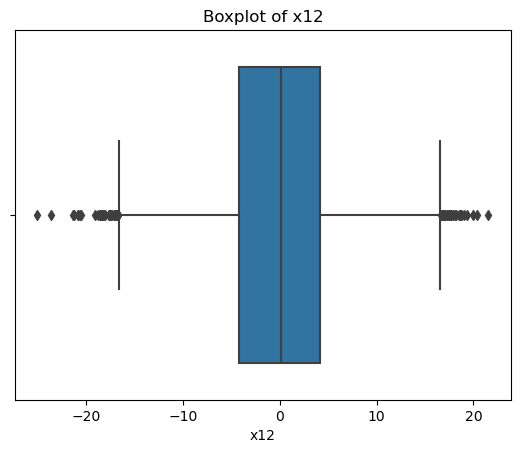

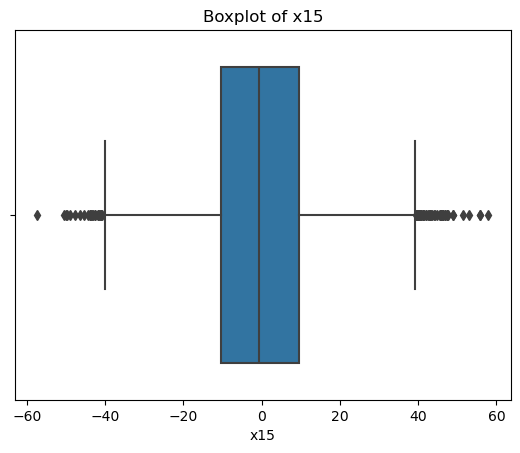

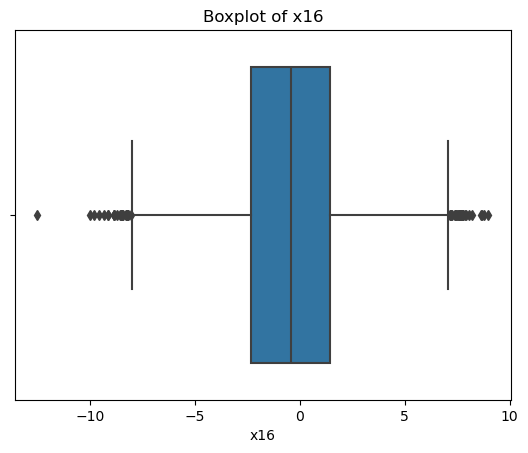

In [9]:
# Generate boxplots for continuous variables
for column in continuous_columns:
    plt.figure()
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


Generated boxplots for each continuous variable to be used for outlier detection. For instance, the boxplot for x0 indicates a fairly symmetric distribution with a few outliers on both the lower and higher ends. On the other hand, the distribution for variables like x4 and x5 seems more compressed with outliers primarily on one side of the box, indicating skewness. Variables x8 and x10 show a large range with several extreme outliers, which could potentially be influential points in any predictive models. The presence of outliers can affect model performance, particularly for algorithms sensitive to extreme values, and may require further investigation or data preprocessing techniques like transformation or removal before modeling.

#### Feature Engineering

In [10]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Inspect unique values of the x7 and x11 which look like they might contain numeric data
x7_unique_values = data['x7'].unique()
x11_unique_values = data['x11'].unique()

# One-hot encode the straightforward categorical columns (x1, x13, x14)
nominal_features = ['x1', 'x13', 'x14']
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(data[nominal_features])

# Create dataframe from onehot encoded variables with column names
nominal_encoded_df = pd.DataFrame(
    onehot_encoded,
    columns=onehot_encoder.get_feature_names_out(nominal_features)
)

# Since 'x17' appears to be ordinal, the category ordering was manually specified
ordinal_features = ['x17']
ordinal_categories = [['small', 'medium', 'large']]  # assuming this is the correct order
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)
ordinal_encoded = ordinal_encoder.fit_transform(data[ordinal_features])

# Create dataframe from ordinal encoded variables with column names
ordinal_encoded_df = pd.DataFrame(
    ordinal_encoded,
    columns=['encoded_' + col for col in ordinal_features]
)

# Concatenate the encoded dataframes to the original data and drop original categorical columns
data_encoded = pd.concat([
    data.drop(nominal_features + ordinal_features, axis=1),
    nominal_encoded_df,
    ordinal_encoded_df
], axis=1)

(x7_unique_values, x11_unique_values, data_encoded.head())


C:\Users\RexAr\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(array(['($1,306.52)', '($24.86)', '($110.85)', ..., '$417.34 ',
        '($1,472.62)', '($863.61)'], dtype=object),
 array(['-0.01%', '0.00%', '0.01%', '0.02%', '-0.02%', '-0.03%', '0.03%',
        '-0.04%', '0.04%'], dtype=object),
           x0         x2         x3        x4         x5         x6  \
 0 -17.933519   6.559220 -14.452810 -4.732855   0.381673   2.563194   
 1 -37.214754  10.774930 -15.384004 -0.077339  10.983774 -15.210206   
 2   0.330441 -19.609972  -9.167911  2.064124  12.071688  12.506141   
 3 -13.709765  -8.011390   6.759264  1.727615  -1.768382  24.039733   
 4  -4.202598   7.076210 -26.004919 -4.269696  -3.414224   2.115989   
 
             x7          x8         x9        x10  ... x13_volkswagon  x14_fri  \
 0  ($1,306.52)  -89.394348 -28.454044 -16.201298  ...            0.0      0.0   
 1     ($24.86)  153.032652 -32.557736  69.675903  ...            0.0      0.0   
 2    ($110.85) -141.437276 -20.794952  55.042604  ...            0.0      0.0   
 3    ($32

Applied feature encoding to the dataset's categorical variables. For nominal features (x1, x13, x14), OneHotEncoder was used, which transforms each unique category into a binary column, effectively handling missing values by treating them as another category. For the ordinal feature x17, an OrdinalEncoder is used to preserve the order of the categories (“small'”, “medium”, “large”). The final dataset has binary columns for each category in x1, x13, x14, and ordered numeric encoding for x17, expanding the feature space and making it ready for modeling. 

In [12]:
import re

def convert_monetary_value(value):
    # Check if value is NaN
    if pd.isna(value):
        return value
    # Ensure value is a string and then clean and convert
    if isinstance(value, str):
        # Remove dollar signs, commas, and parentheses
        cleaned_value = re.sub(r'[,\$\(\)]', '', value)
        # Convert to float
        return float(cleaned_value)
    else:
        # If it's already a numeric type, just return it as is
        return value


def convert_percentage(value):
    if pd.isna(value):
        return value
    if isinstance(value, str):  # Check if the value is a string
        return float(value.strip('%')) / 100
    else:  # If it's already a float or int, just return it as is
        return value


# Apply the conversion functions to x7 and x11
data['x7'] = data['x7'].apply(convert_monetary_value)
data['x11'] = data['x11'].apply(convert_percentage)

# Verify the conversion by checking for NaN values and correct data types
cleaned_data_info = (data[['x7', 'x11']].head(), data[['x7', 'x11']].dtypes)
print(cleaned_data_info)



(        x7     x11
0  1306.52 -0.0001
1    24.86  0.0000
2   110.85  0.0000
3   324.43  0.0001
4  1213.37 -0.0001, x7     float64
x11    float64
dtype: object)


Defined two functions for cleaning the dataset. The “convert_monetary_value” function removed any non-numeric characters (like currency symbols) and converted the string to a float. The “convert_percentage” function stripped percentage symbols from strings and converted the result to a float, dividing by 100 to get the decimal form. Columns are converted to a numeric type (float64) which ensured that monetary and percentage values are in a consistent numeric format for analysis and modeling.

#### Concluding Analysis

Exercise 7.2 has emphasized the importance of thorough Exploratory Data Analysis (EDA) and the foundational role that data quality plays in the modeling process. Despite meticulous preprocessing and feature encoding efforts, the logistic regression model could not be adequately trained due to the dataset's inherent limitations, specifically designed for EDA rather than prediction. Attempts to address missing values and convert data types were made; however, persistent NaN values and data inconsistencies prevented the successful application of logistic regression. Furthermore, without viable model predictions, the calculation of evaluation metrics was not possible. These challenges underscore the assignment's intent—to illustrate the complexities of real-world data and the necessity of rigorous EDA before model building—and highlight that not all datasets are conducive to predictive modeling, particularly when they are intentionally created for academic purposes. 